In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

import warnings
warnings.filterwarnings('ignore')

In [1]:
pd.set_option('display.max_columns', 500)
%matplotlib inline

NameError: name 'pd' is not defined

## EDA

In [ ]:
Housing_df = pd.read_csv("../dataset/housingdata.csv")

In [ ]:
print(Housing_df.shape)
Housing_df.head()

In [5]:
Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
Housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# We observed that there are "NA" which means different than the null here
# To handle that we will replace it with different abbreviation
Housing_df['Alley']=Housing_df['Alley'].replace(np.NaN, 'NAl')

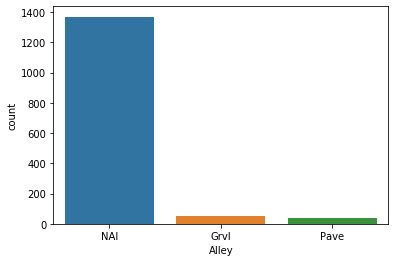

In [8]:
sns.countplot(Housing_df['Alley'])

In [9]:
# We observed that there are "NA" which means different than the null here
# To handle that we will replace it with different abbreviation
Housing_df['BsmtQual']=Housing_df['BsmtQual'].replace(np.NaN, 'NB')

In [10]:
# We observed that there are "NA" which means different than the null here
# To handle that we will replace it with different abbreviation
Housing_df['BsmtCond']=Housing_df['BsmtCond'].replace(np.NaN, 'NB')

In [11]:
# We observed that there are "NA" which means different than the null here
# To handle that we will replace it with different abbreviation
Housing_df['BsmtExposure']=Housing_df['BsmtExposure'].replace(np.NaN, 'NB')

In [12]:
# We observed that there are "NA" which means different than the null here
# To handle that we will replace it with different abbreviation
Housing_df['BsmtFinType1']=Housing_df['BsmtFinType1'].replace(np.NaN, 'NB')

In [13]:
# We observed that there are "NA" which means different than the null here
# To handle that we will replace it with different abbreviation
Housing_df['BsmtFinType2']=Housing_df['BsmtFinType2'].replace(np.NaN, 'NB')

In [14]:
# We observed that there are "NA" which means different than the null here
# To handle that we will replace it with different abbreviation
Housing_df['FireplaceQu']=Housing_df['FireplaceQu'].replace(np.NaN, 'NFp')

In [15]:
# We observed that there are "NA" which means different than the null here
# To handle that we will replace it with different abbreviation
Housing_df['GarageType']=Housing_df['GarageType'].replace(np.NaN, 'NG')

In [16]:
# We observed that there are "NA" which means different than the null here
# To handle that we will replace it with different abbreviation
Housing_df['GarageFinish']=Housing_df['GarageFinish'].replace(np.NaN, 'NG')

In [17]:
# We observed that there are "NA" which means different than the null here
# To handle that we will replace it with different abbreviation
Housing_df['GarageQual']=Housing_df['GarageQual'].replace(np.NaN, 'NG')

In [18]:
# We observed that there are "NA" which means different than the null here
# To handle that we will replace it with different abbreviation
Housing_df['GarageCond']=Housing_df['GarageCond'].replace(np.NaN, 'NG')

In [19]:
# We observed that there are "NA" which means different than the null here
# To handle that we will replace it with different abbreviation
Housing_df['PoolQC']=Housing_df['PoolQC'].replace(np.NaN, 'NP')

In [20]:
# We observed that there are "NA" which means different than the null here
# To handle that we will replace it with different abbreviation
Housing_df['Fence']=Housing_df['Fence'].replace(np.NaN, 'NF')

In [21]:
# We observed that there are "NA" which means different than the null here
# To handle that we will replace it with different abbreviation
Housing_df['MiscFeature']=Housing_df['MiscFeature'].replace(np.NaN, 'None')

In [22]:
# We observed that there are "NaN" as a default in many columns.
# To handle these values we replace "NaN" with NaN
Housing_df=Housing_df.replace('NaN', np.nan)

In [23]:
# We observed that there are "NA" as a default in many columns.
# To handle these values we replace "NA" with NaN
Housing_df=Housing_df.replace('NA', np.nan)

In [24]:
Housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NAl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NFp,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NP,NF,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NAl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NP,NF,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NAl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NP,NF,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NAl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NP,NF,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NAl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NP,NF,None,0,12,2008,WD,Normal,250000


In [25]:
# Check nulls column-wise
Housing_df.isnull().sum(axis=0)/len(Housing_df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

In [26]:
# Check for nulls in a column which are greater than 40%
Housing_df.columns[Housing_df.isnull().sum(axis=0)/len(Housing_df)*100>40]

Index([], dtype='object')

In [27]:
# Check for nulls in a column which are greater than 0%
Housing_df.columns[Housing_df.isnull().sum(axis=0)/len(Housing_df)*100>0]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')

In [28]:
# Checking for numerical variables with nulls
Housing_df[Housing_df.columns[Housing_df.isnull().sum(axis=0)/len(Housing_df)*100>0]].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [29]:
Housing_df['LotFrontage'].median()

69.0

In [30]:
# Here data is not baised and has very less nulls which we can consider to fill with the median value
Housing_df['LotFrontage'].fillna(69.0, inplace = True)

In [31]:
Housing_df['MasVnrArea'].median()

0.0

In [32]:
# Here data is baised and has very less nulls which we can consider to fill with the mean value
Housing_df['MasVnrArea'].fillna(103.685262, inplace = True)

In [33]:
Housing_df['GarageYrBlt'].median()

1980.0

In [34]:
# Here data is not baised and has very less nulls which we can consider to fill with the median value
Housing_df['GarageYrBlt'].fillna(1980.0, inplace = True)

In [35]:
Housing_df['MasVnrArea'].isnull().sum(axis=0)/len(Housing_df['MasVnrArea'])*100

0.0

In [36]:
# Check for nulls in a column which are greater than 0%
Housing_df[Housing_df.columns[Housing_df.isnull().sum(axis=0)/len(Housing_df)*100>0]].isnull().sum(axis=0)/len(Housing_df)*100

MasVnrType    0.547945
Electrical    0.068493
dtype: float64

In [37]:
Housing_df_cat = Housing_df.columns[Housing_df.isnull().sum(axis=0)/len(Housing_df)*100>0]

In [38]:
for val in Housing_df_cat:
    print(val)
    print(Housing_df[val].value_counts()*100/len(Housing_df[val]))
    print()

MasVnrType
None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

Electrical
SBrkr    91.369863
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64



In [39]:
Housing_df_cat = Housing_df.select_dtypes(include ='object')

In [40]:
Housing_df_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [41]:
# Handle nulls by replacing it with mode value
Housing_df['MasVnrType']=Housing_df['MasVnrType'].replace(np.NaN, 'None')

In [42]:
# Handle nulls by replacing it with mode value
Housing_df['Electrical']=Housing_df['Electrical'].replace(np.NaN, 'SBrkr')

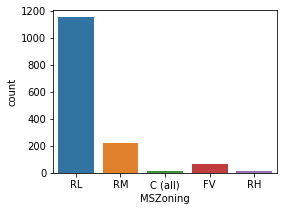

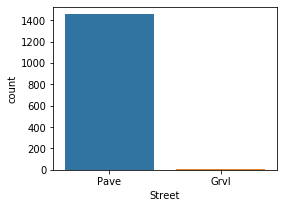

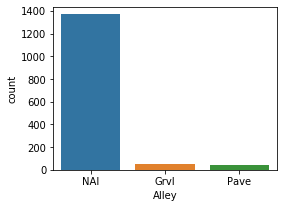

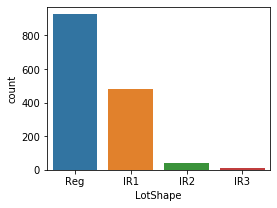

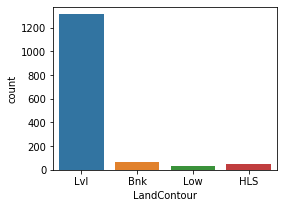

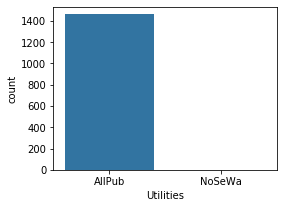

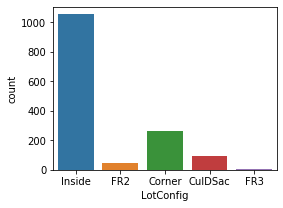

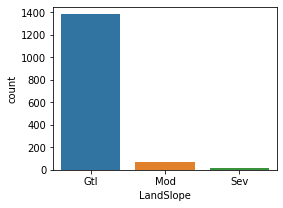

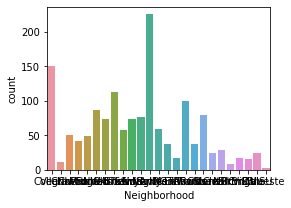

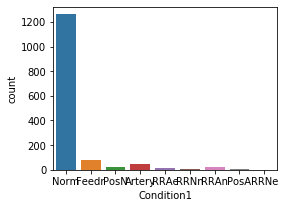

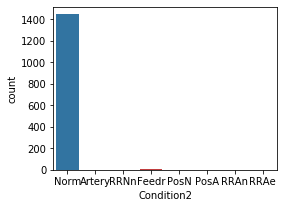

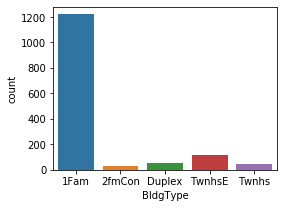

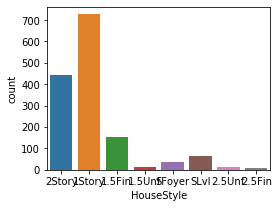

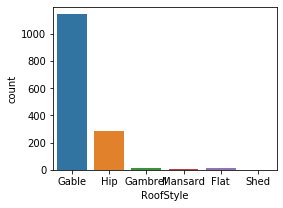

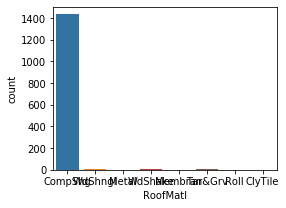

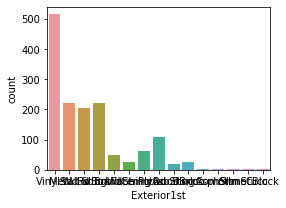

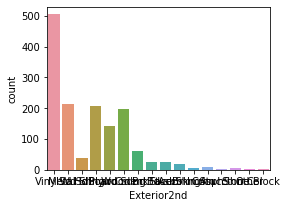

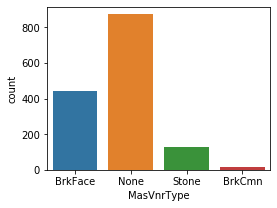

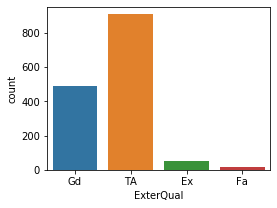

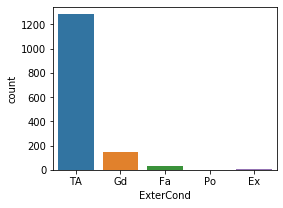

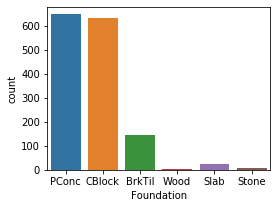

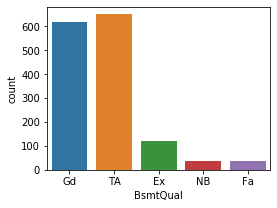

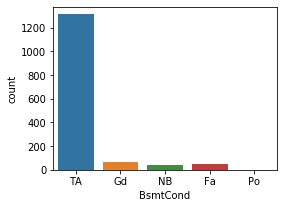

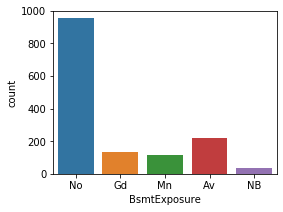

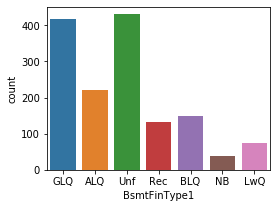

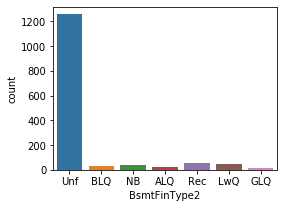

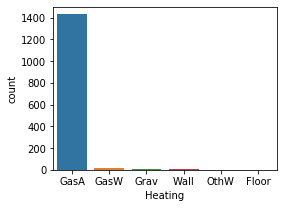

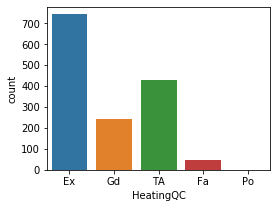

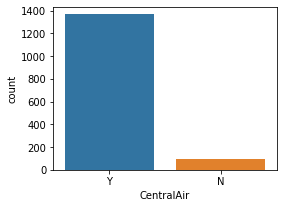

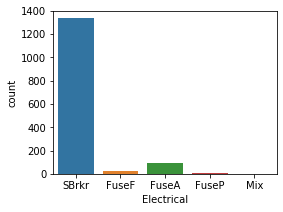

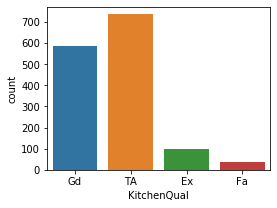

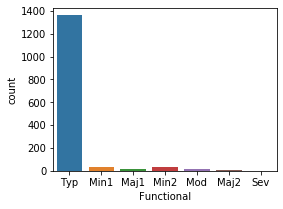

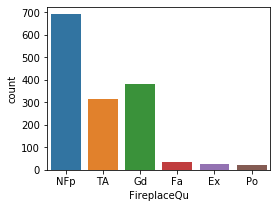

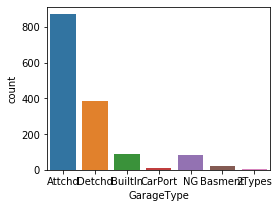

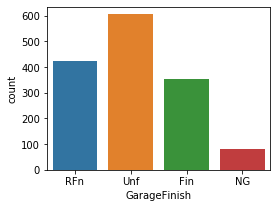

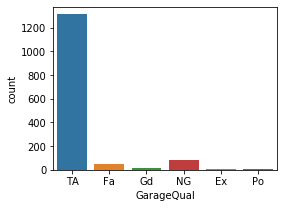

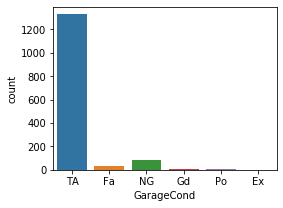

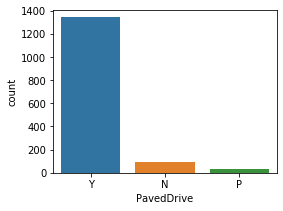

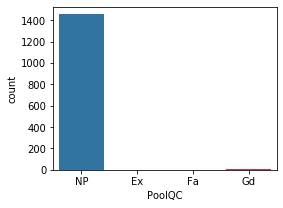

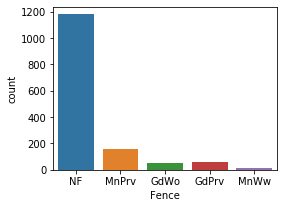

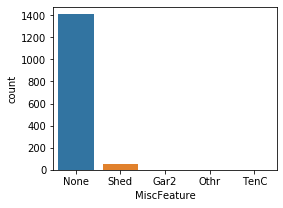

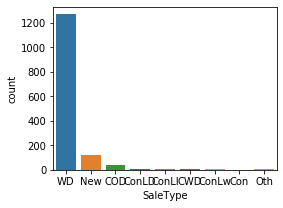

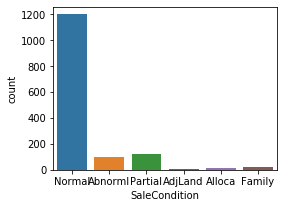

In [43]:
## finding skewed data
for i in Housing_df_cat.columns:
    plt.figure(figsize=[4,3])
    sns.countplot(Housing_df[i])

In [44]:
## dropping skewed columns
Housing_df = Housing_df.drop('Street',1)
Housing_df = Housing_df.drop('Utilities',1)
Housing_df = Housing_df.drop('Condition1',1)
Housing_df = Housing_df.drop('Condition2',1)
Housing_df = Housing_df.drop('BldgType',1)
Housing_df = Housing_df.drop('RoofMatl',1)
Housing_df = Housing_df.drop('Heating',1)
Housing_df = Housing_df.drop('CentralAir',1)
Housing_df = Housing_df.drop('Functional',1)
Housing_df = Housing_df.drop('PoolQC',1)
Housing_df = Housing_df.drop('MiscFeature',1)
Housing_df = Housing_df.drop('BsmtFinType2',1)
Housing_df = Housing_df.drop('BsmtCond',1)
Housing_df = Housing_df.drop('Alley',1)

### converting years to number of years

In [45]:
import datetime

now = datetime.datetime.now()

In [46]:
Housing_df['YearBuilt'] = now.year - Housing_df['YearBuilt']

In [47]:
Housing_df['YearRemodAdd'] = now.year - Housing_df['YearRemodAdd']

In [48]:
Housing_df['GarageYrBlt'] = now.year - Housing_df['GarageYrBlt']

In [49]:
Housing_df['YrSold'] = now.year - Housing_df['YrSold']

### Analysing data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

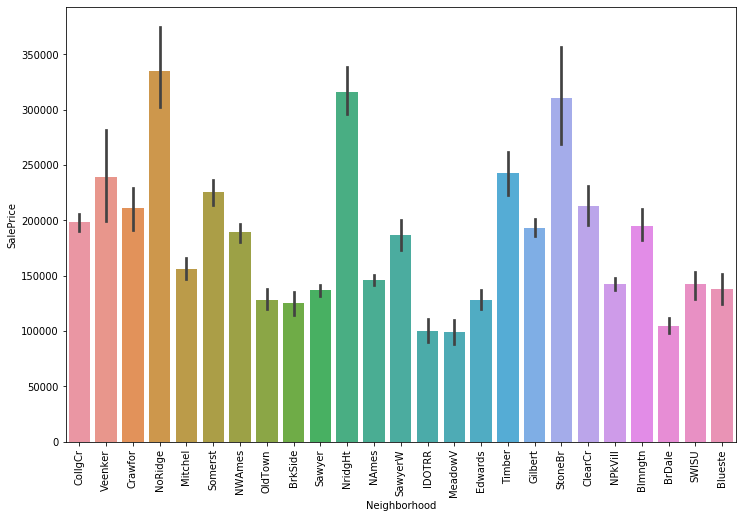

In [50]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data=Housing_df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

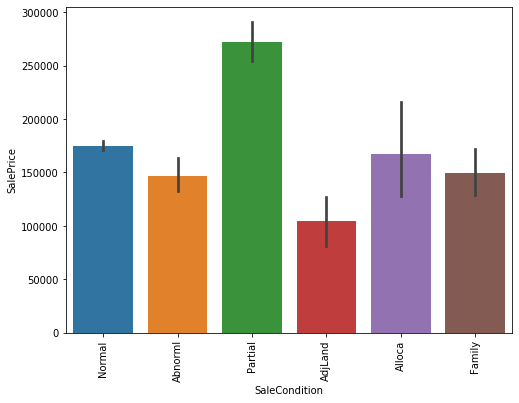

In [51]:
plt.figure(figsize=(8, 6))
sns.barplot(x="SaleCondition", y="SalePrice", data=Housing_df)
plt.xticks(rotation=90)

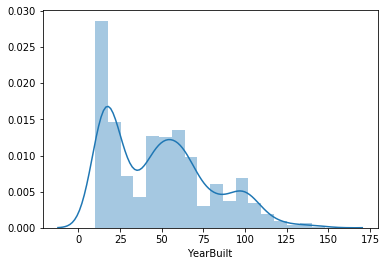

In [52]:
sns.distplot(Housing_df['YearBuilt'])
plt.show()

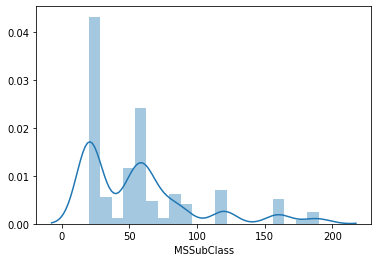

In [53]:
sns.distplot(Housing_df['MSSubClass'])
plt.show()

In [54]:
# correlation matrix
cor = Housing_df.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,0.012713,0.021998,-0.050199,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000122,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,-0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,-0.027850,-0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,-0.116685,-0.083348,0.179042,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,-0.062996,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,-0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,-0.014228,-0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,-0.572323,-0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,-0.514231,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,0.375983,-0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,0.306276,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.043950,-0.077856
YearBuilt,0.012713,-0.027850,-0.116685,-0.014228,-0.572323,0.375983,1.000000,0.592855,-0.314745,-0.249503,0.049107,-0.149040,-0.391452,-0.281986,-0.010308,0.183784,-0.199010,-0.187599,0.038162,-0.468271,-0.242656,0.070651,0.174800,-0.095589,-0.147716,0.777182,-0.537850,-0.478954,-0.224880,-0.188686,0.387268,-0.031355,0.050364,-0.004950,0.034383,-0.012398,-0.013618,-0.522897
YearRemodAdd,0.021998,-0.040581,-0.083348,-0.013788,-0.550684,-0.073741,0.592855,1.000000,-0.179186,-0.128451,0.067759,-0.181133,-0.291066,-0.240379,-0.140024,0.062419,-0.287389,-0.119470,0.012337,-0.439046,-0.183331,0.040581,0.149598,-0.191740,-0.112581,0.616444,-0.420622,-0.371600,-0.205726,-0.226298,0.193919,-0.045286,0.038740,-0.005829,0.010286,-0.021490,0.035743,-0.507101
MasVnrArea,-0.050199,0.022895,0.179042,0.103960,0.410238,-0.127788,-0.314745,-0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,-0.247621,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,-0.249503,-0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,-0.148782,0.224054,0.

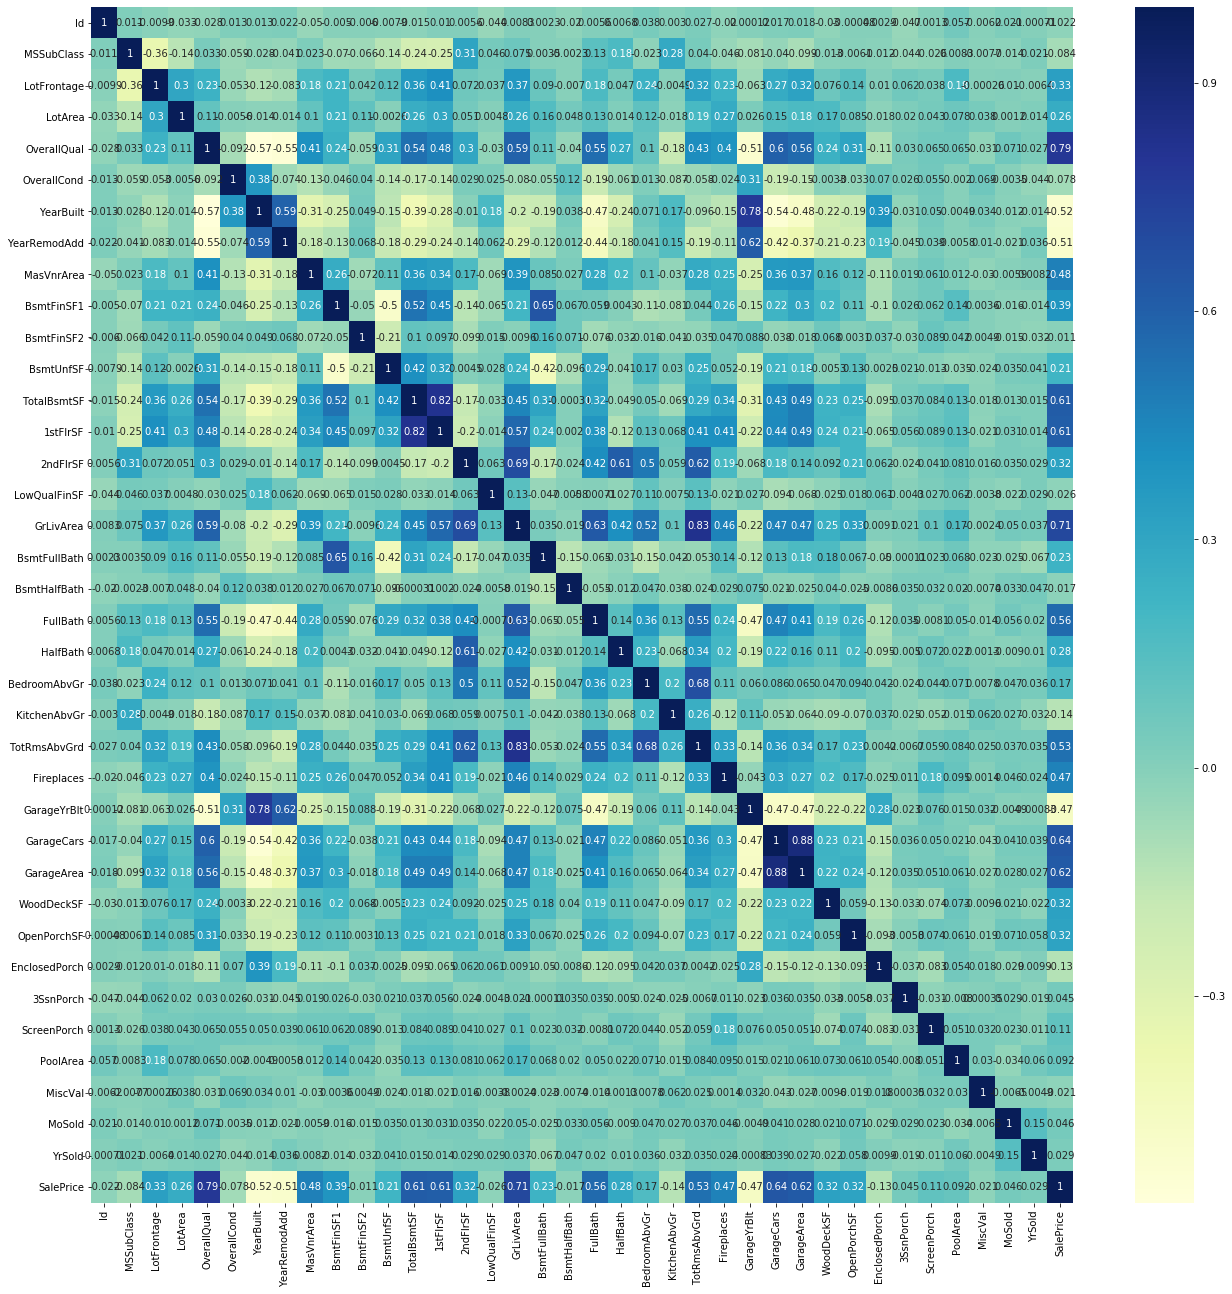

In [55]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(22,22))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


## split into X and y

In [56]:

X = Housing_df.drop(['Id','SalePrice'], axis=1)

In [57]:
# Putting response variable to y
y = Housing_df['SalePrice']

## dummy variables

In [58]:
# creating dummy variables for categorical variables

# subset all categorical variables
price_categorical = X.select_dtypes(include=['object'])
price_categorical.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Ex,SBrkr,Gd,NFp,Attchd,RFn,TA,TA,Y,NF,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,ALQ,Ex,SBrkr,TA,TA,Attchd,RFn,TA,TA,Y,NF,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,GLQ,Ex,SBrkr,Gd,TA,Attchd,RFn,TA,TA,Y,NF,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,No,ALQ,Gd,SBrkr,Gd,Gd,Detchd,Unf,TA,TA,Y,NF,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,GLQ,Ex,SBrkr,Gd,TA,Attchd,RFn,TA,TA,Y,NF,WD,Normal


In [59]:
# convert into dummies
price_dummies = pd.get_dummies(price_categorical, drop_first=True)
price_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NB,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NB,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NB,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NFp,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NG,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NG,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NG,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NF,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,

In [60]:
# drop categorical variables 
X = X.drop(list(price_categorical.columns), axis=1)

In [61]:
# concat dummy variables with X
X = pd.concat([X, price_dummies], axis=1)

## scaling the features

In [62]:

from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=200)

## split into train and test

In [63]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Ridge

In [64]:
from sklearn import metrics

In [65]:

# list of alphas to tune
from sklearn.linear_model import RidgeCV
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [66]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005808,0.001173,0.000793,0.000397,0.0001,{'alpha': 0.0001},-23420.525272,-20897.267397,-22443.115563,-20446.138323,-23494.971466,-22141.657396,1263.433638,28,-16589.974761,-13610.744455,-15631.451092,-16747.841280,-16529.189490,-15821.840216,1172.437131
1,0.005600,0.001358,0.001000,0.000001,0.001,{'alpha': 0.001},-23420.379499,-20897.216086,-22443.072985,-20445.824296,-23494.777773,-22141.507924,1263.454831,27,-16589.937929,-13610.736869,-15631.411929,-16747.831864,-16529.147394,-15821.813197,1172.429871
2,0.004600,0.001200,0.000800,0.000400,0.01,{'alpha': 0.01},-23418.923228,-20896.705169,-22442.647870,-20442.697613,-23492.844546,-22140.017515,1263.664222,26,-16589.570080,-13610.661154,-15631.020445,-16747.737312,-16528.726662,-15821.543131,1172.357250
3,0.003600,0.000490,0.000800,0.000400,0.05,{'alpha': 0.05},-23412.481389,-20894.479914,-22440.772808,-20429.090564,-23484.331849,-22133.485222,1264.540944,25,-16587.949005,-13610.327729,-15629.323469,-16747.319381,-16526.861909,-15820.356299,1172.034907
4,0.003801,0.000400,0.000400,0.000490,0.1,{'alpha': 0.1},-23404.493086,-20891.792965,-22438.460552,-20412.705620,-23473.865401,-22125.517422,1265.521437,24,-16586.020357,-13609.950913,-15627.269400,-16746.830510,-16524.543059,-15818.922847,1171.634683


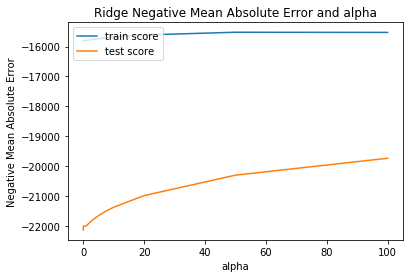

In [67]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Ridge Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [88]:
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

### predict

In [89]:

y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.889365431902149
0.8624626759023982


In [70]:
coef = pd.Series(np.absolute(ridge.coef_), index = X.columns)

In [71]:
coef.sort_values(ascending = False).head()

OverallQual       12670.787495
BsmtQual_Gd       12167.750714
GrLivArea         12142.042525
2ndFlrSF          11286.926544
KitchenQual_Gd     9543.761094
dtype: float64

## Lasso

In [72]:

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   11.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [73]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.083999,0.007456,0.000600,0.000490,0.0001,{'alpha': 0.0001},-23420.237246,-20870.597018,-22442.964551,-20435.623172,-23543.309602,-22143.797729,1281.894229,28,-16589.867401,-13610.566106,-15631.467357,-16747.908690,-16529.652268,-15821.892364,1172.556308
1,0.078200,0.006306,0.001200,0.000400,0.001,{'alpha': 0.001},-23420.218633,-20870.592477,-22442.949529,-20435.590466,-23542.947323,-22143.711164,1281.820395,27,-16589.863100,-13610.563809,-15631.463715,-16747.905892,-16529.646553,-15821.888614,1172.555597
2,0.091549,0.015870,0.003719,0.005950,0.01,{'alpha': 0.01},-23420.032496,-20870.547070,-22442.799325,-20435.263407,-23539.324531,-22142.845510,1281.082639,26,-16589.820564,-13610.552633,-15631.427580,-16747.889667,-16529.590674,-15821.856224,1172.546106
3,0.088951,0.021639,0.000600,0.000800,0.05,{'alpha': 0.05},-23419.204313,-20870.340208,-22442.129738,-20433.808667,-23523.224556,-22138.996602,1277.817938,25,-16589.635184,-13610.508400,-15631.266096,-16747.852750,-16529.350356,-15821.722557,1172.508912
4,0.080199,0.001600,0.001201,0.000401,0.1,{'alpha': 0.1},-23418.163282,-20870.069557,-22441.295780,-20431.988468,-23518.236229,-22137.206503,1277.029169,24,-16589.401778,-13610.458660,-15631.063740,-16747.839597,-16529.044301,-15821.561615,1172.464659


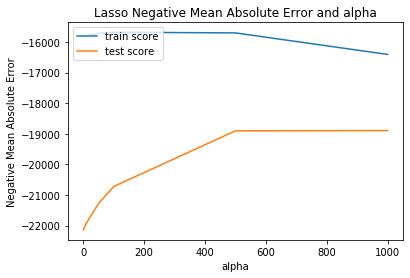

In [74]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Lasso Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [86]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
coef = pd.Series(lasso.coef_, index = X.columns)

### predict

In [87]:

y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8821301207139185
0.863238015264526


### important features

Text(0.5, 1.0, 'Feature importance using Lasso Model')

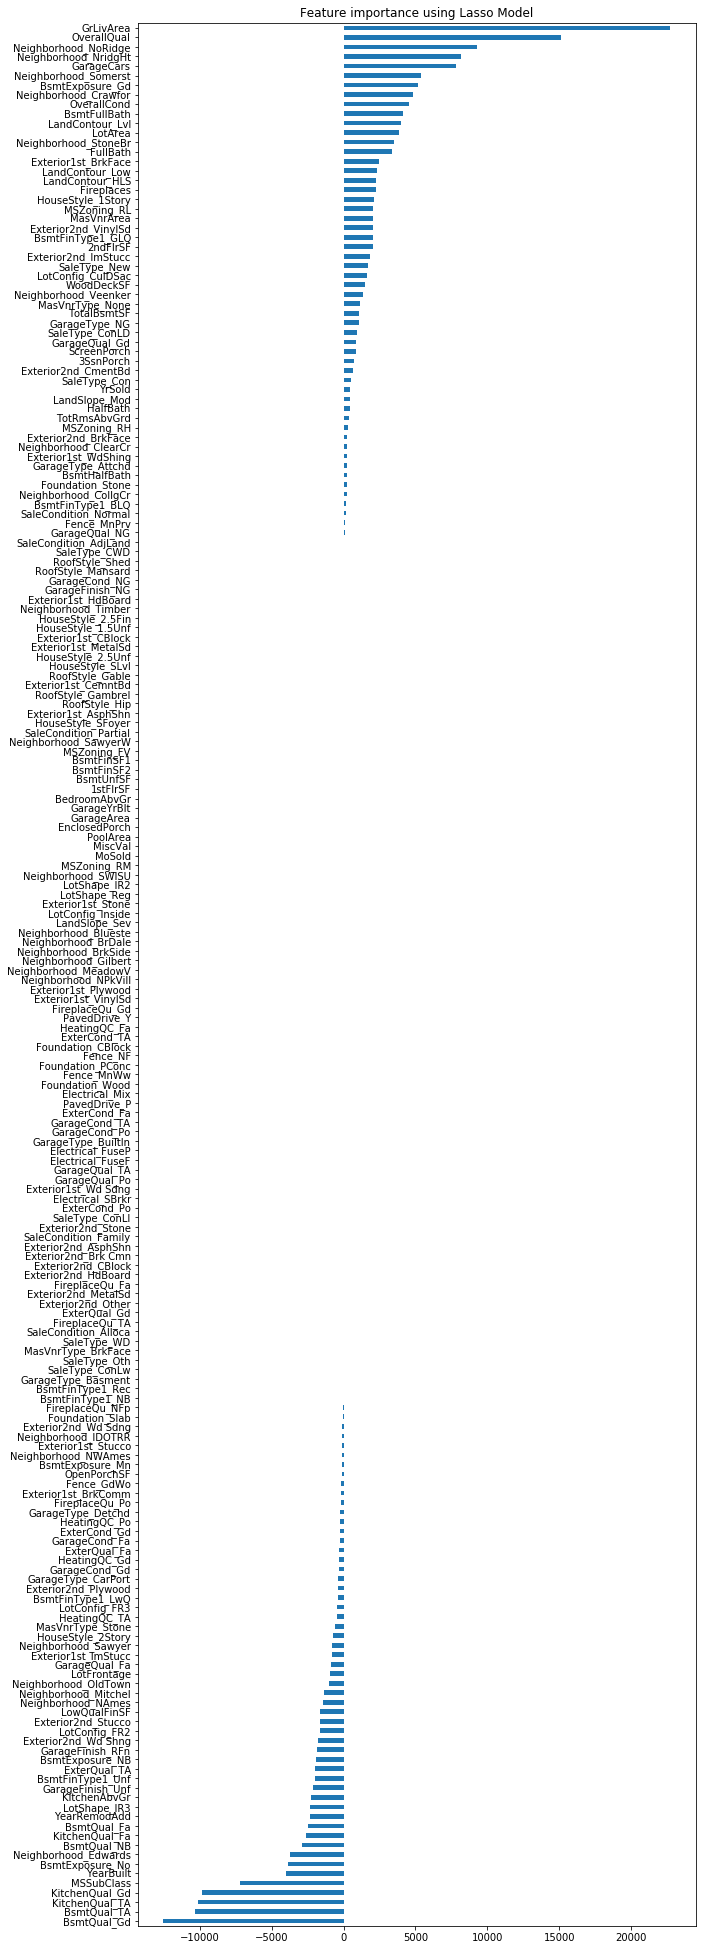

In [77]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (10.0, 35.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [78]:
coef = pd.Series(np.absolute(lasso.coef_), index = X.columns)

In [79]:
coef.sort_values(ascending = False).head(10)

GrLivArea               22730.845422
OverallQual             15102.392519
BsmtQual_Gd             12545.421104
BsmtQual_TA             10359.428753
KitchenQual_TA          10122.175009
KitchenQual_Gd           9835.662118
Neighborhood_NoRidge     9309.545497
Neighborhood_NridgHt     8152.606651
GarageCars               7815.012657
MSSubClass               7228.326191
dtype: float64

In [80]:
coef_used = np.sum(lasso.coef_!=0)

In [81]:
coef_used

116